In [15]:
import numpy as np
import pandas as pd
import os 
from matplotlib import pyplot as plt

In [16]:
path="C:\\Workplace\\C#\\Test\\immonium_mass_neh\\immonium_mass\\bin\\x64\\Debug\\"

data=pd.DataFrame()
for f in ["Liver_l0.csv"]:    
    data=pd.concat([data,pd.read_csv(path+f)])
data=data.dropna() 
data=data.reset_index(drop=True)
    

ratios=[]
for i in range(data.shape[0]): 
    mzs=([ int(float(x)*100)/100 for x in data["values"][i].split("|")])
    intensity=([ int(float(x)*100)/100 for x in data["intensity"][i].split("|")])
#     if( 70.06 in mzs and 71.06 in mzs):
    if( 120.07 in mzs and 121.08 in mzs):
        
        index_1=mzs.index(120.07)#(70.06)
        index_2=mzs.index(121.08)#(71.06)
        
        ratios.append(intensity[index_1]/intensity[index_2])
        
        
# from matplotlib import pyplot as plt
# plt.hist(ratios)

In [17]:
path="C:\\Workplace\\C#\\Test\\immonium_mass_neh\\immonium_mass\\bin\\x64\\Debug\\"

data=pd.DataFrame()
for f in ["Liver_l21.csv"]:    
    data=pd.concat([data,pd.read_csv(path+f)])
data=data.dropna() 
data=data.reset_index(drop=True)
    

ratios2=[]
for i in range(data.shape[0]): 
    mzs=([ int(float(x)*100)/100 for x in data["values"][i].split("|")])
    intensity=([ int(float(x)*100)/100 for x in data["intensity"][i].split("|")])
#     if( 70.06 in mzs and 71.06 in mzs):
    if( 120.07 in mzs and 121.08 in mzs):
        
        index_1=mzs.index(120.07)#(70.06)
        index_2=mzs.index(121.08)#(71.06)
        
        ratios2.append(intensity[index_1]/intensity[index_2])
        
        
# from matplotlib import pyplot as plt
# plt.hist(ratios2)

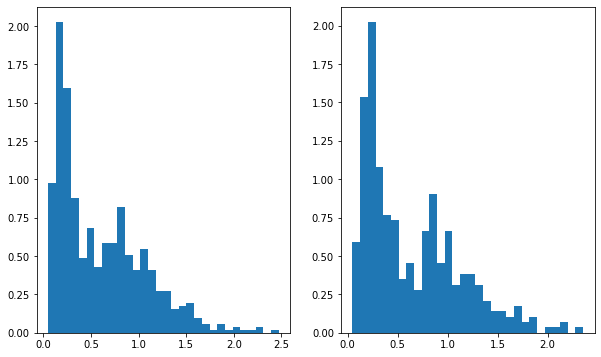

0.6041997664399195 0.4794871384085585 0.45902793198068703
0.6430353301957697 0.47827166625279366 0.4738860766908131


In [22]:
ratios=[x for x in ratios if x <=100]
ratios2=[x for x in ratios2 if x <=100]

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(ratios,density =True,bins=30)
plt.subplot(1,2,2)
plt.hist(ratios2,density =True,bins=30)
plt.show()

print(np.mean(ratios),np.median(ratios),np.std(ratios))
print(np.mean(ratios2),np.median(ratios2),np.std(ratios2))

In [4]:
# all_mz=pd.DataFrame(np.unique([ int(float(j)*100)/100 for i in [x for x in [x.split("|") for x in data["values"]] ] for j in i], return_counts=True)).transpose()
# all_mz.columns=["mz","freq"]
# all_mz=all_mz[all_mz.freq>100]
# all_mz.head(5)

In [5]:
data.columns

Index(['protein', 'peptide', 'charge', 'moverz', 'scan', 'ret', 'values',
       'intensity'],
      dtype='object')

(array([13., 35., 36., 30., 22., 16.,  6.,  3.,  1.,  1.]),
 array([  0.19771837,  11.24508   ,  22.29244163,  33.33980325,
         44.38716488,  55.4345265 ,  66.48188813,  77.52924976,
         88.57661138,  99.62397301, 110.67133464]),
 <BarContainer object of 10 artists>)

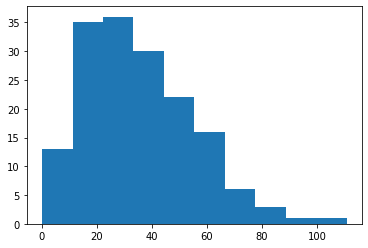

In [17]:
# np.unique(dict_res[list(dict_res.keys())[0]]["all_mzs"],return_counts=True)

In [63]:
# selected_res=[]
# for k in dict_res.keys():
# #     print(k,dict_res[k]["count"],dict_res[k]["total"],"\t===>\t",100*dict_res[k]["count"]/dict_res[k]["total"])
#     selected_res.append([k,dict_res[k]["count"],dict_res[k]["total"],100*dict_res[k]["count"]/dict_res[k]["total"]])

In [64]:
# selected_res=pd.DataFrame(selected_res)
# selected_res.columns=["mz","freq","Total","perc"]
# selected_res=selected_res.sort_values(by="perc",ascending=False).reset_index(drop=True)
# selected_res.to_csv("possible_mz.csv",index=False)
# selected_res.head(50)

In [21]:
selected_res=[]
for k in dict_res.keys():
    
    temp=(pd.DataFrame(np.unique(dict_res[k]["all_mzs"] ,return_counts=True)).transpose())
    temp.columns=["aa","perc"]
    temp.perc=100*temp.perc/dict_res[k]["count"]
    temp=temp.sort_values(by="perc",ascending=False)
    temp=(temp[temp.perc>30].reset_index(drop=True))
    if (temp.shape[0]>0):
        print("mz:",k,"count:",f'{dict_res[k]["count"]}({int(1000*dict_res[k]["count"]/dict_res[k]["total"])/10})',"Range available:",dict_res[k]["total"],"\n")
        print(temp.head(9))
        print("------------------------------------------\n")
  

mz: 65.39 count: 185(100.0) Range available: 185 

       aa        perc
0   65.39  100.000000
1   86.09   99.459459
2   70.06   98.378378
3   72.08   97.297297
4  129.10   95.675676
5  120.08   94.594595
6   84.08   93.513514
7  110.07   88.108108
8   84.04   76.216216
------------------------------------------

mz: 69.07 count: 383(76.1) Range available: 503 

       aa        perc
0   86.09  100.000000
1   69.07  100.000000
2   70.06   97.389034
3   72.08   96.344648
4  129.10   96.083551
5   84.08   94.778068
6  120.08   91.644909
7   87.10   91.644909
8  110.07   86.422977
------------------------------------------

mz: 70.02 count: 135(23.3) Range available: 577 

       aa        perc
0   70.02  100.000000
1   86.09  100.000000
2  129.10   97.777778
3   70.06   97.777778
4   72.08   97.777778
5   84.08   97.777778
6  120.08   95.555556
7  110.07   89.629630
8   84.04   83.703704
------------------------------------------

mz: 70.06 count: 1265(98.9) Range available: 1279 

     

mz: 86.06 count: 103(2.3) Range available: 4347 

       aa        perc
0   86.06  100.000000
1  129.10  100.000000
2   86.09   99.029126
3  110.07   92.233010
4  120.08   91.262136
5   84.08   85.436893
6   84.04   80.582524
7  101.07   79.611650
8  102.05   68.932039
------------------------------------------

mz: 86.09 count: 4853(98.7) Range available: 4913 

       aa        perc
0   86.09  100.000000
1  129.10   94.704307
2  110.07   87.657119
3  120.08   85.493509
4   84.08   81.619617
5   84.04   70.657325
6  101.07   69.709458
7  102.05   59.839275
8   87.10   53.245415
------------------------------------------

mz: 86.1 count: 238(4.8) Range available: 4913 

       aa        perc
0   86.09  100.000000
1   86.10  100.000000
2  129.10   97.058824
3   87.10   93.697479
4  110.07   92.436975
5  120.08   91.596639
6   84.08   86.134454
7   84.04   75.210084
8  101.07   73.109244
------------------------------------------

mz: 86.14 count: 142(2.8) Range available: 4913 

       

mz: 110.07 count: 9840(88.6) Range available: 11094 

       aa        perc
0  110.07  100.000000
1  129.10   95.416667
2  120.08   85.609756
3  101.07   59.095528
4  102.05   49.207317
5   86.09   43.231707
6  112.65   42.997967
7  104.05   41.565041
8   99.79   39.237805
------------------------------------------

mz: 111.07 count: 1123(10.1) Range available: 11108 

       aa        perc
0  111.07  100.000000
1  110.07   98.664292
2  129.10   97.239537
3  120.08   84.238646
4  101.07   65.271594
5  102.05   57.613535
6  112.08   52.092609
7  115.08   49.510240
8  104.05   48.441674
------------------------------------------

mz: 112.07 count: 176(1.5) Range available: 11118 

       aa        perc
0  112.07  100.000000
1  129.10   98.295455
2  120.08   89.204545
3  110.07   88.068182
4  101.07   64.204545
5  102.05   57.954545
6  104.05   56.250000
7   86.09   51.136364
8  129.06   47.727273
------------------------------------------

mz: 112.08 count: 3447(30.6) Range available: 11

mz: 129.06 count: 5270(34.7) Range available: 15177 

       aa        perc
0  129.06  100.000000
1  129.10   95.730550
2  120.08   80.417457
3  110.07   68.538899
4  101.07   53.491461
5  102.05   44.516129
6  112.65   35.009488
7  104.05   34.914611
8  115.08   33.643264
------------------------------------------

mz: 129.09 count: 485(3.1) Range available: 15180 

       aa        perc
0  129.09  100.000000
1  129.10   99.587629
2  120.08   76.494845
3  110.07   74.226804
4  101.07   49.072165
5  102.05   47.422680
6  129.06   41.030928
7  101.10   39.587629
8  104.05   36.701031
------------------------------------------

mz: 129.1 count: 14047(91.6) Range available: 15322 

       aa        perc
0  129.10  100.000000
1  120.08   77.988183
2  110.07   66.839895
3  101.07   43.382929
4  102.05   36.142949
5  129.06   35.915142
6  112.65   34.519826
7   86.09   32.718730
8  104.05   30.504734
------------------------------------------

mz: 129.11 count: 109(0.7) Range available: 1532

In [85]:
selected_res=[]
for k in dict_res.keys():
    
    possible_aa=list(set([key for key,val in aas_residualmz.items() if val >=k ])- set(['K','L','R']))
    
    temp=[]
    for i in range(len(possible_aa)):
        for j in range(i+1,len(possible_aa)):
            for pep in dict_res[k]["peps"]:
                if possible_aa[i] in pep and possible_aa[j] in pep:
                    temp.append("".join(sorted(possible_aa[i]+possible_aa[j])))               
    
    temp=(pd.DataFrame(np.unique(temp,return_counts=True)).transpose())
    temp.columns=["aa","perc"]
    temp.perc=100*temp.perc/dict_res[k]["count"]
    temp=temp.sort_values(by="perc",ascending=False)
    temp=(temp[temp.perc>50].reset_index(drop=True))
    if temp.shape[0]>0:
        print(k,dict_res[k]["count"],dict_res[k]["total"],"\t===>\t",100*dict_res[k]["count"]/dict_res[k]["total"],"\n")
        print(temp)
        print("------------------------------------------\n")
    
    
#     selected_res.append([k,dict_res[k]["count"],dict_res[k]["total"],100*dict_res[k]["count"]/dict_res[k]["total"]])

104.04 122 9187 	===>	 1.3279634265810385 

   aa       perc
0  EM  53.278689
------------------------------------------



In [16]:
[key for key,val in aas_residualmz.items() if val >=75 ]

['S',
 'P',
 'V',
 'T',
 'C',
 'I',
 'L',
 'N',
 'D',
 'Q',
 'K',
 'E',
 'M',
 'H',
 'F',
 'R',
 'Y',
 'W']